In [85]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import KMeans

from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans,AffinityPropagation

In [86]:
def gmm(X,k):
    gmm = GMM(n_components=k, covariance_type='full')
    gmm.fit(X)
    X_predicted = [ [] for i in range(k)]
    for x in X:
        X_predicted[gmm.predict([x])[0]].append(x)
    return X_predicted

In [87]:
def kmeans(X,k):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X)
    X_predicted = [ [] for i in range(k)]
    for x in X:
        X_predicted[kmeans.predict([x])[0]].append(x.tolist())
    return X_predicted

In [90]:
RNASeq_path = 'RPKMOutput/RNASeq.txt' 
RPF_path = 'RPKMOutput/RPF.txt'

In [91]:
RNASeq = pd.read_csv(RNASeq_path, sep='\t')
RPF = pd.read_csv(RPF_path, sep='\t')

In [92]:
RNASeq.head()

,AccNum,GeneName,cdReads0,cdRPKM0,cdReads1,cdRPKM1,cdReads2,cdRPKM2,cdReads3,cdRPKM3,cdReads4,cdRPKM4
0,NM_017847,ODR4,50.0,6.642349,62.0,5.591876,71.0,6.004645,30.0,5.369988,51.0,8.507454
1,NM_001143986,TLE6,4.0,0.421957,6.0,0.429708,3.0,0.201468,3.0,0.426413,3.0,0.397381
2,NM_001003803,ATP5S,29.0,8.115351,52.0,9.879314,52.0,9.263817,19.0,7.164127,22.0,7.730539
3,NM_001003800,BICD2,778.0,54.937502,1155.0,55.371390,1444.0,64.913315,706.0,67.172940,883.0,78.293873
4,NM_016649,ESF1,17.0,1.206070,26.0,1.252307,10.0,0.451649,9.0,0.860333,20.0,1.781686


In [93]:
RPF.head()

,AccNum,GeneName,cdReads0,cdRPKM0,cdReads1,cdRPKM1,cdReads2,cdRPKM2,cdReads3,cdRPKM3,cdReads4,cdRPKM4
0,NM_017847,ODR4,93.0,16.487335,62.0,13.206484,49.0,15.968568,37.0,16.540714,39.0,20.464235
1,NM_001143986,TLE6,4.0,0.563098,2.0,0.338285,2.0,0.517555,1.0,0.354984,1.0,0.416666
2,NM_001003803,ATP5S,81.0,30.248942,83.0,37.241851,71.0,48.740039,46.0,43.317961,26.0,28.738355
3,NM_001003800,BICD2,501.0,47.210965,389.0,44.043594,284.0,49.195554,257.0,61.069347,230.0,64.149959
4,NM_016649,ESF1,69.0,6.532635,52.0,5.915217,41.0,7.135519,26.0,6.207228,26.0,7.285780


In [94]:
RNASeq = RNASeq[(RNASeq['cdReads0'] >= 10) & (RNASeq['cdReads1'] >= 10) & (RNASeq['cdReads2'] >= 10)& (RNASeq['cdReads3'] >= 10)& (RNASeq['cdReads4'] >= 10)]
RPF = RPF[(RPF['cdReads0'] >= 10) & (RPF['cdReads1'] >= 10) & (RPF['cdReads2'] >= 10)& (RPF['cdReads3'] >= 10)& (RPF['cdReads4'] >= 10)]

In [95]:
RNASeq[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']] = RNASeq[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']].apply(np.log2)

In [96]:
RPF[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']] = RPF[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']].apply(np.log2)

In [97]:
RNASeq['log2cdRPKM1']=RNASeq['cdRPKM1']-RNASeq['cdRPKM0']
RNASeq['log2cdRPKM2']=RNASeq['cdRPKM2']-RNASeq['cdRPKM0']
RNASeq['log2cdRPKM3']=RNASeq['cdRPKM3']-RNASeq['cdRPKM0']
RNASeq['log2cdRPKM4']=RNASeq['cdRPKM4']-RNASeq['cdRPKM0']

In [98]:
RPF['log2cdRPKM1']=RPF['cdRPKM1']-RPF['cdRPKM0']
RPF['log2cdRPKM2']=RPF['cdRPKM2']-RPF['cdRPKM0']
RPF['log2cdRPKM3']=RPF['cdRPKM3']-RPF['cdRPKM0']
RPF['log2cdRPKM4']=RPF['cdRPKM4']-RPF['cdRPKM0']

# TE

### ONLY RUN FOR MEDIAN NORMALIZATION

In [65]:
RNASeq['log2cdRPKM1']-=np.median(RNASeq['log2cdRPKM1'])
RNASeq['log2cdRPKM2']-=np.median(RNASeq['log2cdRPKM2'])
RNASeq['log2cdRPKM3']-=np.median(RNASeq['log2cdRPKM3'])
RNASeq['log2cdRPKM4']-=np.median(RNASeq['log2cdRPKM4'])

In [99]:
filteredRNASeq = RNASeq[(RNASeq['log2cdRPKM1'] <= 0.5) 
                        & (RNASeq['log2cdRPKM2'] <= 0.5)
                        & (RNASeq['log2cdRPKM3'] <= 0.5)
                        & (RNASeq['log2cdRPKM4'] <= 0.5)]
filteredRNASeq = filteredRNASeq[(filteredRNASeq['log2cdRPKM1'] >= -0.5) 
                                & (filteredRNASeq['log2cdRPKM2'] >= -0.5)
                                & (filteredRNASeq['log2cdRPKM3'] >= -0.5)
                                & (filteredRNASeq['log2cdRPKM4'] >= -0.5)]

In [100]:
filteredRNASeq.shape

(6062, 16)

In [101]:
TE = reduce(lambda left,right: pd.merge(left,right,on=['AccNum','GeneName']), [RPF,filteredRNASeq])

In [102]:
TE['cdRPKM0_x'] = TE['cdRPKM0_x']-TE['cdRPKM0_y']
TE['cdRPKM1_x'] = TE['cdRPKM1_x']-TE['cdRPKM1_y']
TE['cdRPKM2_x'] = TE['cdRPKM2_x']-TE['cdRPKM2_y']
TE['cdRPKM3_x'] = TE['cdRPKM3_x']-TE['cdRPKM3_y']
TE['cdRPKM4_x'] = TE['cdRPKM4_x']-TE['cdRPKM4_y']
for i in range(0,5):
    TE.rename(columns={'cdRPKM'+str(i)+'_x':'TE'+str(i)}, inplace=True)
TE = TE[['AccNum', 'GeneName','TE0','TE1','TE2','TE3','TE4']]

In [103]:
TE['foldTE1']=TE['TE1']-TE['TE0']
TE['foldTE2']=TE['TE2']-TE['TE0']
TE['foldTE3']=TE['TE3']-TE['TE0']
TE['foldTE4']=TE['TE4']-TE['TE0']

In [104]:
TE.head()

,AccNum,GeneName,TE0,TE1,TE2,TE3,TE4,foldTE1,foldTE2,foldTE3,foldTE4
0,NM_017847,ODR4,1.311593,1.239842,1.411084,1.623031,1.266305,-0.071751,0.099491,0.311438,-0.045287
1,NM_001003803,ATP5S,1.898159,1.914442,2.395429,2.596103,1.894337,0.016283,0.497270,0.697943,-0.003823
2,NM_016647,THEM6,0.051293,0.207781,0.361159,0.620028,0.068366,0.156488,0.309866,0.568735,0.017073
3,NM_016640,MRPS30,0.556363,0.551786,0.263127,0.284844,0.340352,-0.004577,-0.293236,-0.271519,-0.216011
4,NM_001080825,TMEM120B,0.237953,0.493599,0.790843,0.390857,0.455389,0.255646,0.552890,0.152904,0.217436


In [105]:
TE.keys()

Index(['AccNum', 'GeneName', 'TE0', 'TE1', 'TE2', 'TE3', 'TE4', 'foldTE1',
       'foldTE2', 'foldTE3', 'foldTE4'],
      dtype='object')

In [74]:
TE.shape

(5642, 11)

In [106]:
TE.to_csv('/Users/akankshitadash/Desktop/TE_nonChrE.txt',sep='\t',index=False)

In [43]:
TE = TE[['AccNum','GeneName','foldTE1',
       'foldTE2', 'foldTE3', 'foldTE4']]

In [44]:
TE.to_csv('/Users/akankshitadash/Desktop/TE_ChrE_03.txt',sep='\t',index=False)

In [45]:
X = TE[['foldTE1',
       'foldTE2', 'foldTE3', 'foldTE4']].values

971
971 971
97
97 97
677
677 677
586
586 586
373
373 373


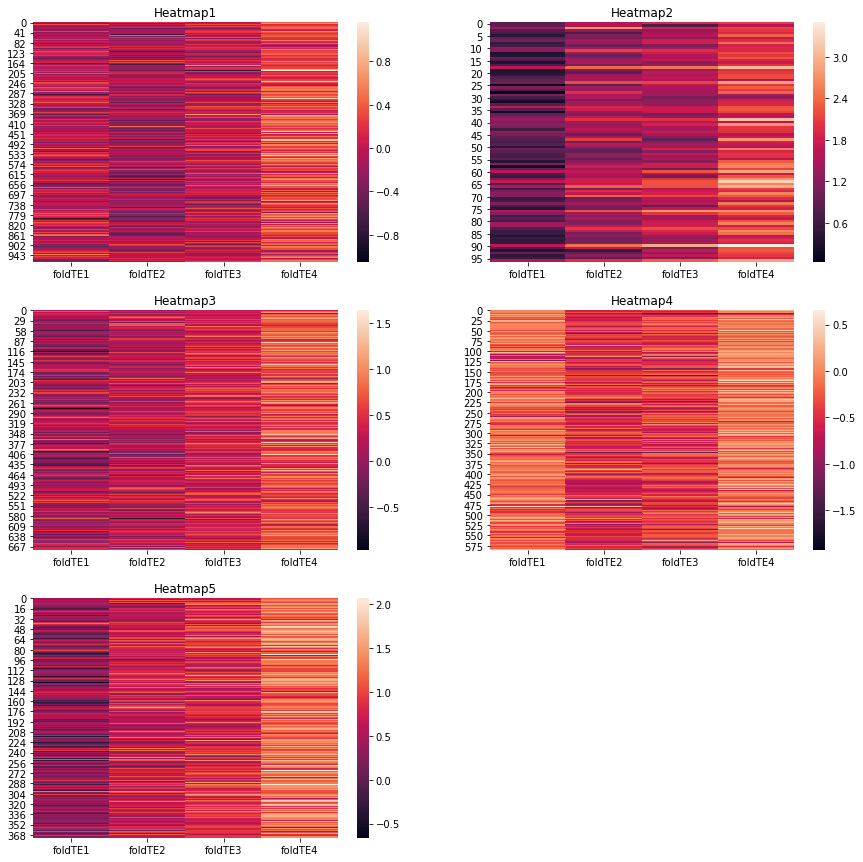

546
546 546
94
94 94
606
606 606
331
331 331
551
551 551
576
576 576


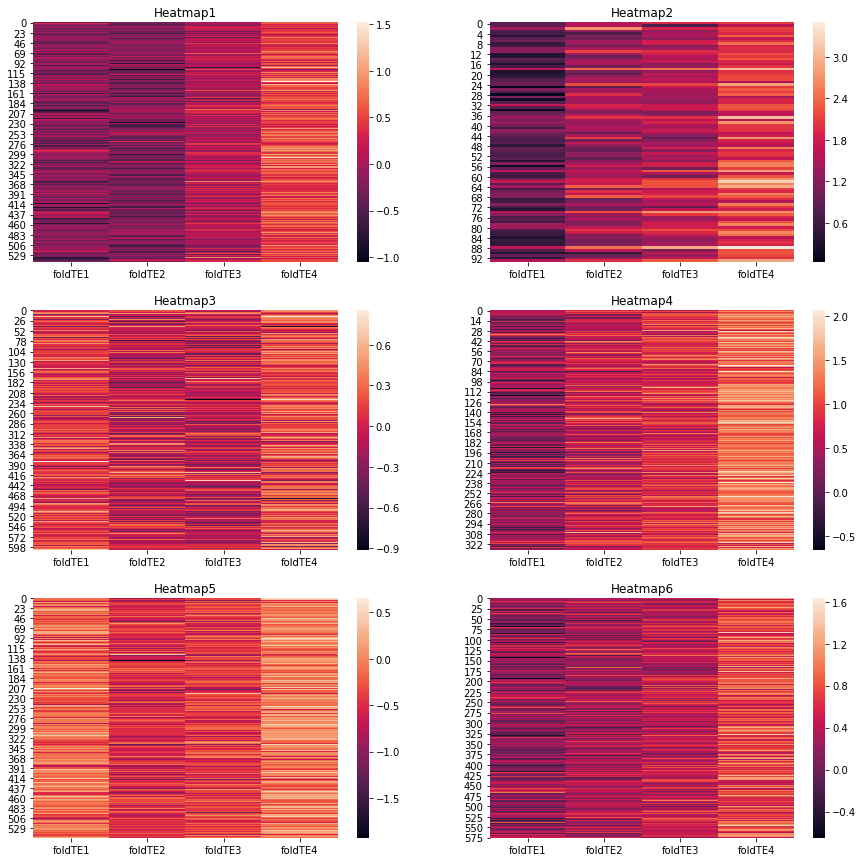

In [50]:
def plot_heatmap(X,idx):
    plt.subplot(3, 2, idx+1)
#     plt.figure()
    sns.heatmap(X,xticklabels=['foldTE1',
       'foldTE2', 'foldTE3', 'foldTE4'])
    plt.title('Heatmap'+str(idx+1))

# list_nums = [5]   
# for num in list_nums:
#     clusters = kmeans(X,num)
#     idx=0
#     for cluster in clusters:
#         print(len(cluster))
#         plot_heatmap(cluster)
#         idx+=1
        
list_nums = [5,6]
for num in list_nums:
    clusters = kmeans(X,num) 
    f = plt.figure(figsize=(15,15))    
    for idx,cluster in enumerate(clusters):
        print(len(cluster))
        plot_heatmap(cluster,idx)
        genes=[]
        acc_nums=[]
        for row in cluster:
            temp = TE.loc[(TE['foldTE1'] == row[0])& (TE['foldTE2']== row[1]) & (TE['foldTE3']== row[2])]
            if(not temp.empty):
                genes.append(temp['GeneName'].values[0])
                acc_nums.append(temp['AccNum'].values[0])
        print(len(cluster),len(genes))
        with open('/Users/akankshitadash/Desktop/'+str(num)+'/Gene'+str(idx+1)+'.txt','w') as f:
            for gene in genes:
                f.write("%s\n" % gene)
        with open('/Users/akankshitadash/Desktop/'+str(num)+'/AccNum'+str(idx+1)+'.txt','w') as f:
            for acc_num in acc_nums:
                f.write("%s\n" % acc_num)
    plt.savefig('/Users/akankshitadash/Desktop/Heatmap'+str(num))
    plt.show()

In [ ]:
# def plot_heatmap(X):
#     plt.figure()
#     sns.heatmap(X,xticklabels=['TE0', 'TE1', 'TE2', 'TE3', 'TE4', 'foldTE1',
#        'foldTE2', 'foldTE3', 'foldTE4'])
#     plt.title('Heatmap')
#     plt.savefig('NonChrE/KMeansOutputTE/Heatmap'+str(len(X)))
#     plt.show()

# list_nums = [5]   
# for num in list_nums:
#     clusters = kmeans(X,num)
#     idx=0
#     for cluster in clusters:
#         print(len(cluster))
#         plot_heatmap(cluster)
#         idx+=1

# RPF

In [75]:
RPF.keys()

Index(['AccNum', 'GeneName', 'cdReads0', 'cdRPKM0', 'cdReads1', 'cdRPKM1',
       'cdReads2', 'cdRPKM2', 'cdReads3', 'cdRPKM3', 'cdReads4', 'cdRPKM4',
       'log2cdRPKM1', 'log2cdRPKM2', 'log2cdRPKM3', 'log2cdRPKM4'],
      dtype='object')

In [76]:
RPF.head()

,AccNum,GeneName,cdReads0,cdRPKM0,cdReads1,cdRPKM1,cdReads2,cdRPKM2,cdReads3,cdRPKM3,cdReads4,cdRPKM4,log2cdRPKM1,log2cdRPKM2,log2cdRPKM3,log2cdRPKM4
0,NM_017847,ODR4,93.0,4.041663,62.0,3.721315,49.0,3.825044,37.0,3.233134,39.0,3.390564,-0.320348,-0.216618,-0.808529,-0.651098
2,NM_001003803,ATP5S,81.0,4.917189,83.0,5.216993,71.0,5.434917,46.0,4.622078,26.0,3.880437,0.299804,0.517728,-0.295111,-1.036752
3,NM_001003800,BICD2,501.0,5.559427,389.0,5.459000,284.0,5.448337,257.0,5.117561,230.0,5.038908,-0.100426,-0.111089,-0.441865,-0.520519
4,NM_016649,ESF1,69.0,2.706042,52.0,2.562571,41.0,2.662900,26.0,1.819134,26.0,1.900615,-0.143471,-0.043142,-0.886908,-0.805427
5,NM_016647,THEM6,132.0,5.669262,89.0,5.365215,73.0,5.522523,56.0,4.953399,33.0,4.271920,-0.304046,-0.146739,-0.715862,-1.397342


In [77]:
RPF_new = reduce(lambda left,right: pd.merge(left,right,on=['AccNum','GeneName']), [RPF,filteredRNASeq])

In [78]:
RPF_new.head()
for i in range(0,5):
    RPF_new.rename(columns={'cdRPKM'+str(i)+'_x':'cdRPKM'+str(i)}, inplace=True)
RPF_new = RPF_new[['AccNum', 'GeneName','cdRPKM0','cdRPKM1','cdRPKM2','cdRPKM3','cdRPKM4']]

In [107]:
RPF_new.to_csv('/Users/akankshitadash/Desktop/RPF_NonchrE.txt',sep='\t',index=False)

In [108]:
RPF_new.shape

(5642, 7)

In [ ]:
X = RPF_new[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']].values

In [ ]:
list_nums = [4,5,6]
for num in list_nums:
    clusters = kmeans(X,num)
    for cluster in clusters:
        print(len(cluster))
    for idx,cluster in enumerate(clusters):
        genes=[]
        acc_nums=[]
        for row_nd in cluster:
            row = row_nd[0].tolist()
            temp = RPF.loc[(RPF['cdRPKM0'] == row[0])& (RPF['cdRPKM1']== row[1]) & (RPF['cdRPKM2']== row[2])]
            if(not temp.empty):
                genes.append(temp['GeneName'].values[0])
                acc_nums.append(temp['AccNum'].values[0])
        print(len(cluster),len(genes))
        with open('NonChrE/KMeansOutputRPF/'+str(num)+'/Gene'+str(idx+1)+'.txt','w') as f:
            for gene in genes:
                f.write("%s\n" % gene)
        with open('NonChrE/KMeansOutputRPF/'+str(num)+'/AccNum'+str(idx+1)+'.txt','w') as f:
            for acc_num in acc_nums:
                f.write("%s\n" % acc_num)

In [ ]:
import random
def plot_heatmap(X):
    plt.figure()
    sns.heatmap(X,xticklabels=['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4'])
    plt.title('Heatmap')
    plt.savefig('NonChrE/KMeansOutputRPF/Heatmap'+str(len(X)))
    plt.show()

list_nums = [5]   
for num in list_nums:
    clusters = kmeans(X,num)
    idx=0
    for cluster in clusters:
        print(len(cluster))
        plot_heatmap(cluster)
        idx+=1

In [ ]:
RNASeq['log2cdRPKM1']

# Median Normalize

-0.0141017899809


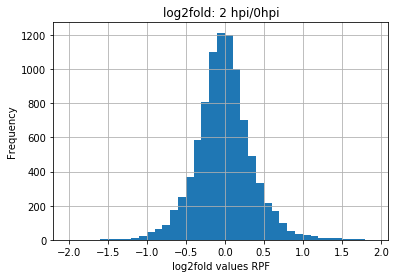

In [27]:
plt.hist(RPF['log2cdRPKM1'], bins = np.arange(-2.0,2.0,0.1))
print(np.median(RPF['log2cdRPKM1']))
plt.xlabel('log2fold values RPF')
plt.ylabel('Frequency')
plt.title('log2fold: 2 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

-0.160924884532


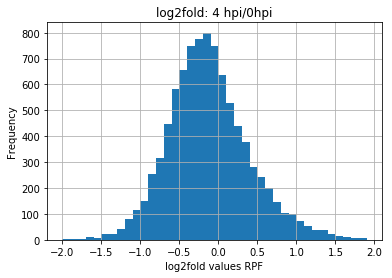

In [28]:
plt.hist(RPF['log2cdRPKM2'], bins = np.arange(-2.0,2.0,0.1))
print(np.median(RPF['log2cdRPKM2']))

plt.xlabel('log2fold values RPF')
plt.ylabel('Frequency')
plt.title('log2fold: 4 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

-0.78138590165


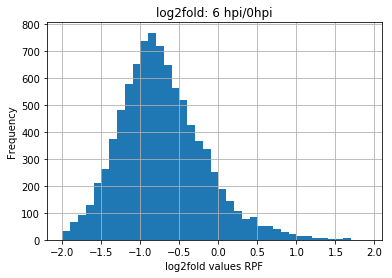

In [29]:

plt.hist(RPF['log2cdRPKM3'], bins = np.arange(-2.0,2.0,0.1))
print(np.median(RPF['log2cdRPKM3']))


plt.xlabel('log2fold values RPF')
plt.ylabel('Frequency')
plt.title('log2fold: 6 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

-0.895368741896


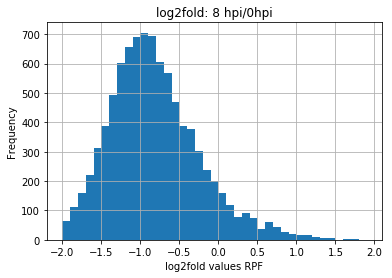

In [30]:

plt.hist(RPF['log2cdRPKM4'], bins = np.arange(-2.0,2.0,0.1))
print(np.median(RPF['log2cdRPKM4']))

plt.xlabel('log2fold values RPF')
plt.ylabel('Frequency')
plt.title('log2fold: 8 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

In [ ]:
RNASeq_2['log2cdRPKM1']=RNASeq_2['cdRPKM1']-RNASeq_2['cdRPKM0']
RNASeq_2['log2cdRPKM2']=RNASeq_2['cdRPKM2']-RNASeq_2['cdRPKM0']
RNASeq_2['log2cdRPKM3']=RNASeq_2['cdRPKM3']-RNASeq_2['cdRPKM0']
RNASeq_2['log2cdRPKM4']=RNASeq_2['cdRPKM4']-RNASeq_2['cdRPKM0']

In [ ]:
RNASeq.head(5)

In [ ]:
RNASeq_2.head(5)

In [ ]:
filteredRNASeq = RNASeq_2[(RNASeq_2['log2cdRPKM1'] <= 0.5) 
                        & (RNASeq_2['log2cdRPKM2'] <= 0.5)
                        & (RNASeq_2['log2cdRPKM3'] <= 0.5)
                        & (RNASeq_2['log2cdRPKM4'] <= 0.5)]
filteredRNASeq = filteredRNASeq[(filteredRNASeq['log2cdRPKM1'] >= -0.5) 
                                & (filteredRNASeq['log2cdRPKM2'] >= -0.5)
                                & (filteredRNASeq['log2cdRPKM3'] >= -0.5)
                                & (filteredRNASeq['log2cdRPKM4'] >= -0.5)]



In [ ]:
filteredRNASeq = RNASeq[(RNASeq['log2cdRPKM1'] <= 0.5) 
                        & (RNASeq['log2cdRPKM2'] <= 0.5)
                        & (RNASeq['log2cdRPKM3'] <= 0.5)
                        & (RNASeq['log2cdRPKM4'] <= 0.5)]
filteredRNASeq = filteredRNASeq[(filteredRNASeq['log2cdRPKM1'] >= -0.5) 
                                & (filteredRNASeq['log2cdRPKM2'] >= -0.5)
                                & (filteredRNASeq['log2cdRPKM3'] >= -0.5)
                                & (filteredRNASeq['log2cdRPKM4'] >= -0.5)]



In [ ]:
filteredRNASeq.head(5)

In [ ]:
print(filteredRNASeq.shape)

In [ ]:
TE = reduce(lambda left,right: pd.merge(left,right,on=['AccNum','GeneName']), [RPF,RNASeq])
TE.head()

In [ ]:
TE.shape

In [ ]:
TE['cdRPKM0_x'] = TE['cdRPKM0_x']-TE['cdRPKM0_y']
TE['cdRPKM1_x'] = TE['cdRPKM1_x']-TE['cdRPKM1_y']
TE['cdRPKM2_x'] = TE['cdRPKM2_x']-TE['cdRPKM2_y']
TE['cdRPKM3_x'] = TE['cdRPKM3_x']-TE['cdRPKM3_y']
TE['cdRPKM4_x'] = TE['cdRPKM4_x']-TE['cdRPKM4_y']
for i in range(0,5):
    TE.rename(columns={'cdRPKM'+str(i)+'_x':'TE'+str(i)}, inplace=True)
TE = TE[['AccNum', 'GeneName','TE0','TE1','TE2','TE3','TE4']]
TE.head()

In [ ]:
TE['foldTE1']=TE['TE1']-TE['TE0']
TE['foldTE2']=TE['TE2']-TE['TE0']
TE['foldTE3']=TE['TE3']-TE['TE0']
TE['foldTE4']=TE['TE4']-TE['TE0']

In [ ]:
TE.head(5)

In [ ]:
plt.hist(TE['foldTE1'], bins = np.arange(-2.0,2.0,0.1))


plt.xlabel('log2fold values TE')
plt.ylabel('Frequency')
plt.title('log2fold: 2 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

In [ ]:
plt.hist(TE['foldTE2'], bins = np.arange(-2.0,2.0,0.1))


plt.xlabel('log2fold values TE')
plt.ylabel('Frequency')
plt.title('log2fold: 4 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

In [ ]:
plt.hist(TE['foldTE3'], bins = np.arange(-2.0,2.0,0.1))


plt.xlabel('log2fold values TE')
plt.ylabel('Frequency')
plt.title('log2fold: 6 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

In [ ]:
plt.hist(TE['foldTE4'], bins = np.arange(-2.0,2.0,0.1))


plt.xlabel('log2fold values TE')
plt.ylabel('Frequency')
plt.title('log2fold: 8 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

In [ ]:
TE.to_csv('/Users/akankshitadash/Desktop/TE_medianNormalize.txt',sep='\t',index=False)

In [ ]:
previous = 'AdjustedRPKMOutput/RPF_chrE/geneTXCD_RPKMoutput_EVadjusted_ReadOutput_'
timepoints = ['ATCACG-s_7_1_genome.txt','TTAGGC-s_7_1_genome.txt',
             'CAGATC-s_7_1_genome.txt','GCCAAT-s_7_1_genome.txt',
             'CTTGTA-s_7_1_genome.txt'
            ]
dataframes = []
for idx,file in enumerate(timepoints):
    df = pd.read_csv(previous+file, sep="	", na_values=['-'])
    df = df.dropna(how='any')
    df = df[['AccNum', 'GeneName','cdReads',
       'cdRPKM']]
    df.rename(columns={'cdRPKM':'cdRPKM'+str(idx), 'cdReads':'cdReads'+str(idx)}, inplace=True)
    dataframes.append(df)

In [ ]:
previous = 'AdjustedRPKMOutput/RNASeq_chrE/geneTXCD_RPKMoutput_EVadjusted_ReadOutput_'
timepoints = ['ATCACG-s_6_1_genome.txt','TTAGGC-s_6_1_genome.txt',
             'CAGATC-s_6_1_genome.txt','GCCAAT-s_6_1_genome.txt',
             'CTTGTA-s_6_1_genome.txt'
            ]
dataframes = []
for idx,file in enumerate(timepoints):
    df = pd.read_csv(previous+file, sep="	", na_values=['-'])
    df = df.dropna(how='any')
    df = df[['AccNum', 'GeneName','cdReads',
       'cdRPKM']]
    df.rename(columns={'cdRPKM':'cdRPKM'+str(idx), 'cdReads':'cdReads'+str(idx)}, inplace=True)
    dataframes.append(df)

In [ ]:
df_rnaseq = reduce(lambda left,right: pd.merge(left,right,on=['AccNum','GeneName']), dataframes)
df_rnaseq.to_csv('AdjustedRPKMOutput/RNASeq_chrE.txt',sep='\t',index=False)